In [1]:
#####kaggle https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

############ loading train and test datasets ##############
df  = pd.read_csv('sample_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

##### Filling NAN values ##################
train_data['PoolQC'] = train_data['PoolQC'].fillna('NA')
train_data['Alley'] = train_data['Alley'].fillna('NA')
train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('NA')
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('NA')
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('NA')
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('NA')
train_data['GarageType'] = train_data['GarageType'].fillna('NA')
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('NA')
train_data['GarageQual'] = train_data['GarageQual'].fillna('NA')
train_data['GarageCond'] = train_data['GarageCond'].fillna('NA')
train_data['Fence'] = train_data['Fence'].fillna('NA')
train_data['MiscFeature'] = train_data['MiscFeature'].fillna('NA')
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mode()[0],inplace = True)
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0],inplace = True)
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0],inplace = True)
train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0],inplace = True)
train_data['Electrical'].fillna(train_data['Electrical'].mode()[0],inplace = True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mode()[0],inplace = True)

train_data['YrSold_build'] = 2021 - train_data['YrSold']
train_data.drop(['YrSold'],axis=1,inplace = True)
train_data['YearBuilt_build'] = 2021 - train_data['YearBuilt']
train_data.drop(['YearBuilt'],axis=1,inplace = True)
train_data['YearRemodAdd_build'] = 2021 - train_data['YearRemodAdd']
train_data.drop(['YearRemodAdd'],axis=1,inplace = True)

train_data  = pd.get_dummies(train_data,drop_first=True)

########## checking for coreelation #############
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(train_data,0.85)

############ Dropping highly corelated columns ########################
train_data = train_data.drop(['BsmtFinType1_NA',
 'BsmtFinType2_NA',
 'ExterCond_TA',
 'ExterQual_TA',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'FireplaceQu_NA',
 'GarageArea',
 'GarageCond_NA',
 'GarageFinish_NA',
 'GarageQual_NA',
 'MiscFeature_Shed',
 'Neighborhood_Somerst',
 'PoolQC_NA',
 'RoofStyle_Hip',
 'SaleCondition_Partial'],axis=1)

In [3]:
X = train_data.drop(['Id','SalePrice'],axis=1)
y = train_data['SalePrice']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
gbr_y_pred = gbr.predict(X_test)

print("test data Score:", gbr.score(X_test,y_test))
print("train data Score:" , gbr.score(X_train,y_train))

from sklearn.metrics import r2_score
re = r2_score(y_test, gbr_y_pred)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, gbr_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, gbr_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_y_pred)))



test data Score: 0.8834137196673312
train data Score: 0.9715726039350839
r2 sqyuare value 0.8834137196673312
MAE: 16832.346437207147
MSE: 791503259.3122102
RMSE: 28133.667718806417


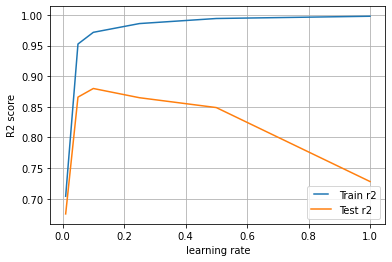

In [13]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(learning_rate=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    re_train = r2_score(y_train, train_pred)
    train_results.append(re_train)
    test_pred = model.predict(X_test)
    re_test = r2_score(y_test, test_pred)
    test_results.append(re_test)
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, label= 'Train r2')
line2, = plt.plot(learning_rates, test_results, label='Test r2' )
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 score')
plt.xlabel('learning rate')
plt.grid()
plt.show()


In [14]:
from sklearn.model_selection import RandomizedSearchCV
loss = ['ls', 'lad', 'huber']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8] 
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features,
     'learning_rate':learning_rate}

gbr = GradientBoostingRegressor()
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=gbr,
            param_distributions=hyperparameter_grid,
            cv=4, n_iter=50,
            n_jobs = -1,
            verbose = 5, 
            random_state=42)
random_cv.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, verbose=5)

In [15]:
random_cv.best_params_

{'n_estimators': 1100,
 'min_samples_split': 6,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 3,
 'loss': 'huber',
 'learning_rate': 0.05}

In [18]:
X = train_data.drop(['Id','SalePrice'],axis=1)
y = train_data['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

gbr_best = GradientBoostingRegressor(n_estimators = 1100,
 min_samples_split =  6,
 min_samples_leaf =  8,
 max_features= 'log2',
 max_depth= 3,
 loss= 'huber',
 learning_rate= 0.05)

In [19]:
gbr_best.fit(X_train,y_train)
gbr_y_pred_best = gbr_best.predict(X_test)

print("test data Score:", gbr_best.score(X_test,y_test))
print("train data Score:" , gbr_best.score(X_train,y_train))

from sklearn.metrics import r2_score
re = r2_score(y_test, gbr_y_pred_best)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, gbr_y_pred_best))
print('MSE:', metrics.mean_squared_error(y_test, gbr_y_pred_best))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_y_pred_best)))

test data Score: 0.870110289102507
train data Score: 0.949667568754551
r2 sqyuare value 0.870110289102507
MAE: 15914.754880729957
MSE: 881820135.5522484
RMSE: 29695.456479944005
